In [26]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (mean_squared_error, mean_absolute_percentage_error,
                            accuracy_score, precision_score, recall_score, f1_score,
                            confusion_matrix, classification_report, log_loss,
                            roc_auc_score, roc_curve, precision_recall_curve, average_precision_score,
                            ConfusionMatrixDisplay)

from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
data.shape

(12330, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
data.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [6]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


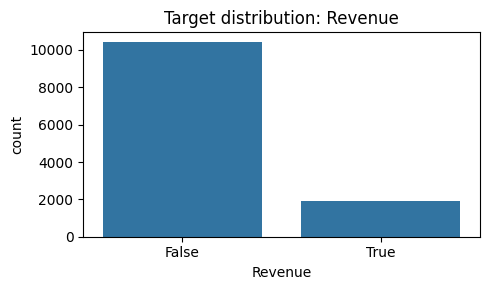

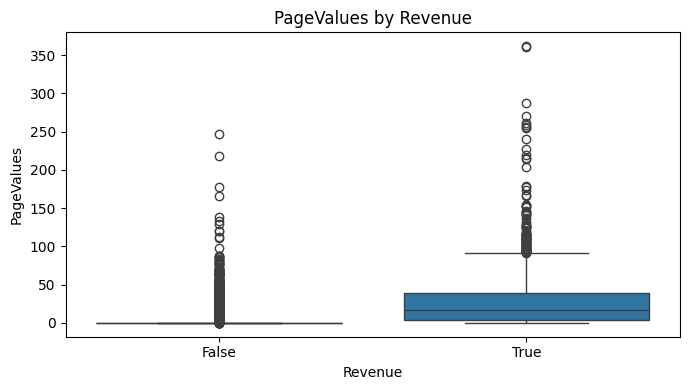

In [25]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Revenue', data=data)
plt.title('Target distribution: Revenue')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
sns.boxplot(x='Revenue', y='PageValues', data=data)
plt.title('PageValues by Revenue')
plt.tight_layout()
plt.show()

In [7]:
target_col = 'Revenue'

data[target_col].value_counts()
data[target_col].value_counts(normalize=True)

,proportion
Revenue,
False,0.845255
True,0.154745


Гипотезы:
1. Из-за дисбаланса классов accuracy будет выше чем F1 macro.
2. При увеличении глубины дерева больше 10 будет переобучение (train score вырастет, test score упадет).
3. Признак PageValues будет самым важным по feature importance дерева для предсказания Revenue.
4. Зависимость может быть нелинейной, у decision tree будет выше F1 macro чем у логистической регрессии.
5. Logistic Regression после StandardScaler даст лучше F1, чем без масштабирования, т.к. признаки имеют разные масштабы.

In [8]:
y = data[target_col].astype(int)

X_raw = data.drop(columns=[target_col]).copy()
X_object = X_raw.select_dtypes('object')
X_numeric = X_raw.select_dtypes(exclude='object')

ohe = OneHotEncoder(sparse_output=True, drop='first', handle_unknown='ignore')
ohe.fit(X_object)

codes = ohe.transform(X_object).toarray()
feature_names = ohe.get_feature_names_out(X_object.columns.tolist())

data_coded = pd.concat(
    [
        X_numeric.reset_index(drop=True),
        pd.DataFrame(codes, columns=feature_names).astype(int)
    ],
    axis=1
)

X = data_coded.copy()

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

X_train.shape, X_test.shape

((8631, 26), (3699, 26))

In [9]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_sc, y_train)

y_pred = log_reg.predict(X_test_sc)
y_proba = log_reg.predict_proba(X_test_sc)[:, 1]

pd.DataFrame({
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'Precision': [precision_score(y_test, y_pred, zero_division=0)],
    'Recall': [recall_score(y_test, y_pred, zero_division=0)],
    'F1': [f1_score(y_test, y_pred, zero_division=0)],
    'Log-Loss': [log_loss(y_test, y_proba)],
    'ROC-AUC': [roc_auc_score(y_test, y_proba)],
}, index=['LogReg']).round(4)

,Accuracy,Precision,Recall,F1,Log-Loss,ROC-AUC
LogReg,0.8797,0.726,0.3566,0.4783,0.2998,0.8913


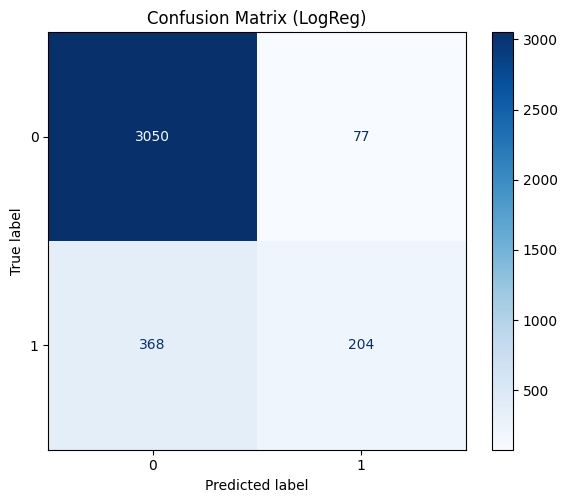

In [10]:
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues')
ax.set_title('Confusion Matrix (LogReg)')
plt.tight_layout()
plt.show()

In [11]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

pd.DataFrame({
    'Accuracy': [accuracy_score(y_test, y_pred_dt)],
    'Precision': [precision_score(y_test, y_pred_dt, zero_division=0)],
    'Recall': [recall_score(y_test, y_pred_dt, zero_division=0)],
    'F1': [f1_score(y_test, y_pred_dt, zero_division=0)],
    'Log-Loss': [log_loss(y_test, y_proba_dt)],
    'ROC-AUC': [roc_auc_score(y_test, y_proba_dt)],
}, index=['DecisionTree (depth=5)']).round(4)

,Accuracy,Precision,Recall,F1,Log-Loss,ROC-AUC
DecisionTree (depth=5),0.8956,0.7183,0.535,0.6132,0.2698,0.9126


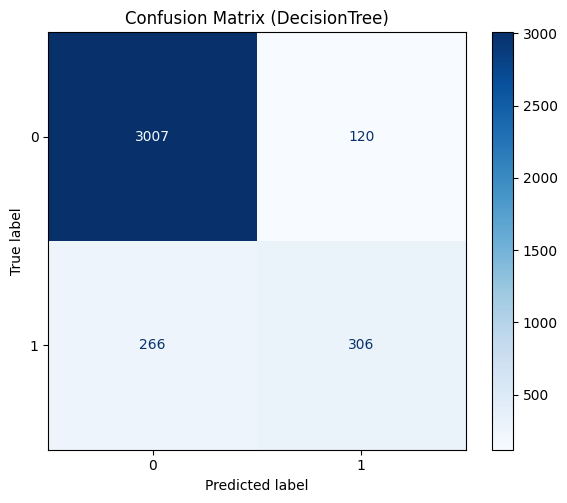

In [12]:
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, ax=ax, cmap='Blues')
ax.set_title('Confusion Matrix (DecisionTree)')
plt.tight_layout()
plt.show()

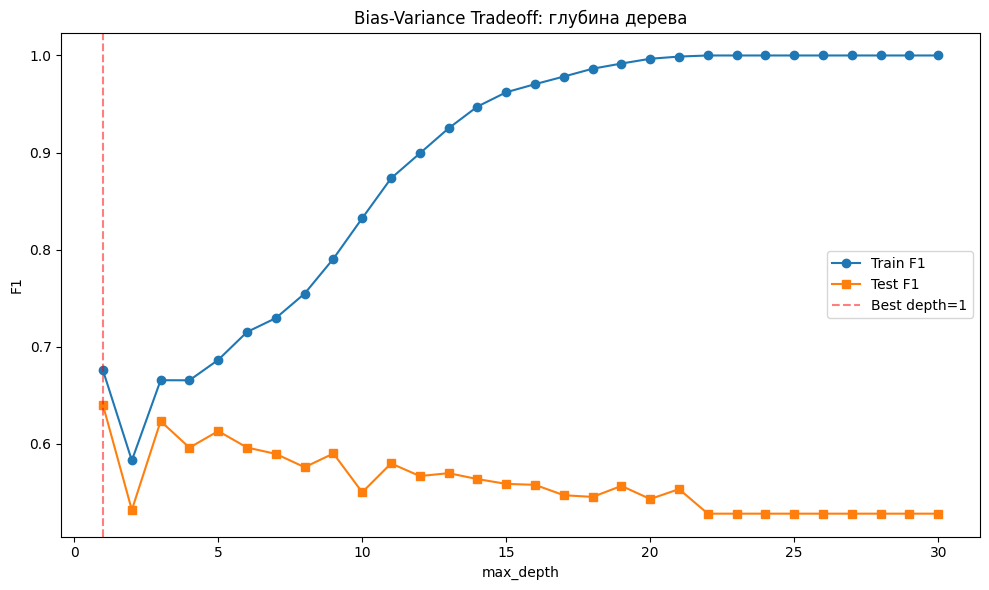

In [13]:
depths = range(1, 31)
train_f1, test_f1 = [], []

for d in depths:
    dt_tmp = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt_tmp.fit(X_train, y_train)

    train_f1.append(f1_score(y_train, dt_tmp.predict(X_train), zero_division=0))
    test_f1.append(f1_score(y_test, dt_tmp.predict(X_test), zero_division=0))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(depths, train_f1, 'o-', label='Train F1')
ax.plot(depths, test_f1, 's-', label='Test F1')
ax.axvline(x=depths[np.argmax(test_f1)], color='red', linestyle='--', alpha=0.5,
           label=f'Best depth={depths[np.argmax(test_f1)]}')
ax.set_xlabel('max_depth')
ax.set_ylabel('F1')
ax.set_title('Bias-Variance Tradeoff: глубина дерева')
ax.legend()
plt.tight_layout()
plt.show()

In [14]:
df_depth = pd.DataFrame({
    'max_depth': list(depths),
    'train_f1': train_f1,
    'test_f1': test_f1
}).sort_values('test_f1', ascending=False)

df_depth.head(10)

,max_depth,train_f1,test_f1
0,1,0.675633,0.639824
2,3,0.665611,0.623474
4,5,0.686567,0.613226
5,6,0.715292,0.596285
3,4,0.665541,0.596173
8,9,0.790774,0.590164
6,7,0.729581,0.589769
10,11,0.873482,0.579946
7,8,0.754828,0.576032
12,13,0.925049,0.569902


In [15]:
best_depth = int(df_depth.iloc[0]['max_depth'])

dt_best = DecisionTreeClassifier(random_state=42, max_depth=best_depth)
dt_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

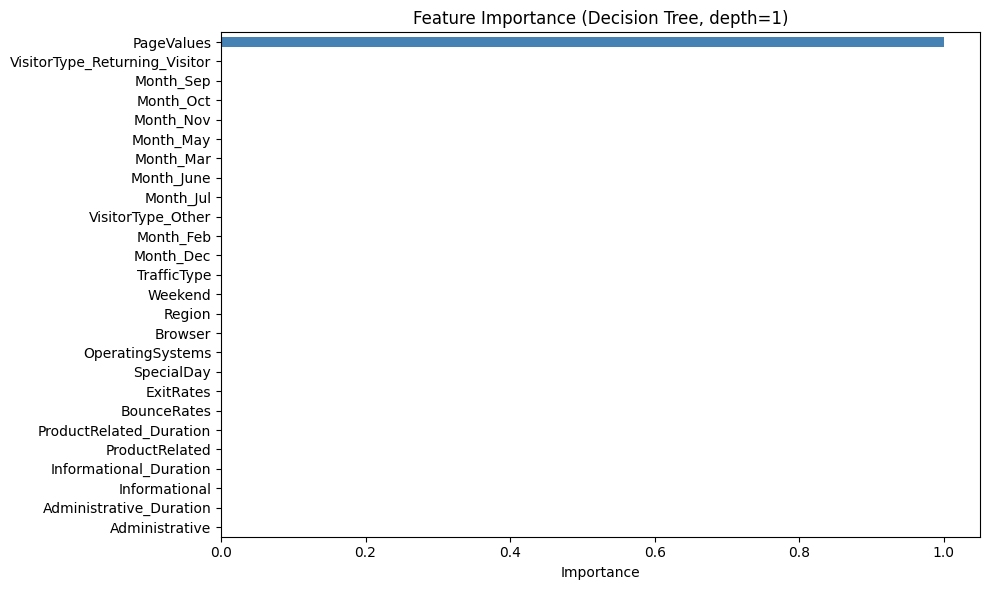

,0
PageValues,1.0
Administrative,0.0
Informational,0.0
Informational_Duration,0.0
ProductRelated,0.0
ProductRelated_Duration,0.0
BounceRates,0.0
ExitRates,0.0
SpecialDay,0.0
Administrative_Duration,0.0


In [16]:
importances = pd.Series(dt_best.feature_importances_, index=X.columns).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(10, 6))
importances.plot.barh(ax=ax, color='steelblue')
ax.set_title(f'Feature Importance (Decision Tree, depth={best_depth})')
ax.set_xlabel('Importance')
plt.tight_layout()
plt.show()

importances.sort_values(ascending=False).head(10)

In [21]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_params_, round(grid_search.best_score_, 4)

({'criterion': 'gini',
  'max_depth': 1,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 np.float64(0.6736))

GridSearchCV (5-fold, scoring=F1) выбрал параметры: max_depth=1, criterion=gini, min_samples_split=2, min_samples_leaf=1. Это подтверждает, что увеличение глубины приводит к переобучению и ухудшению качества на тесте.

In [22]:
best_dt = grid_search.best_estimator_

y_pred_best_dt = best_dt.predict(X_test)
y_proba_best_dt = best_dt.predict_proba(X_test)[:, 1]

pd.DataFrame({
    'Accuracy': [accuracy_score(y_test, y_pred_best_dt)],
    'Precision': [precision_score(y_test, y_pred_best_dt, zero_division=0)],
    'Recall': [recall_score(y_test, y_pred_best_dt, zero_division=0)],
    'F1': [f1_score(y_test, y_pred_best_dt, zero_division=0)],
    'Log-Loss': [log_loss(y_test, y_proba_best_dt)],
    'ROC-AUC': [roc_auc_score(y_test, y_proba_best_dt)],
}, index=['DT (GridSearch best)']).round(4)

,Accuracy,Precision,Recall,F1,Log-Loss,ROC-AUC
DT (GridSearch best),0.867,0.5504,0.764,0.6398,0.2965,0.8249


In [23]:
log_reg_raw = LogisticRegression(max_iter=1000, random_state=42)
log_reg_raw.fit(X_train, y_train)

y_pred_raw = log_reg_raw.predict(X_test)
y_proba_raw = log_reg_raw.predict_proba(X_test)[:, 1]

pd.DataFrame({
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_raw),
    ],
    'Precision': [
        precision_score(y_test, y_pred, zero_division=0),
        precision_score(y_test, y_pred_raw, zero_division=0),
    ],
    'Recall': [
        recall_score(y_test, y_pred, zero_division=0),
        recall_score(y_test, y_pred_raw, zero_division=0),
    ],
    'F1': [
        f1_score(y_test, y_pred, zero_division=0),
        f1_score(y_test, y_pred_raw, zero_division=0),
    ],
    'Log-Loss': [
        log_loss(y_test, y_proba),
        log_loss(y_test, y_proba_raw),
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_proba),
        roc_auc_score(y_test, y_proba_raw),
    ],
}, index=['LogReg (scaled)', 'LogReg (raw)']).round(4)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,Precision,Recall,F1,Log-Loss,ROC-AUC
LogReg (scaled),0.8797,0.7260,0.3566,0.4783,0.2998,0.8913
LogReg (raw),0.8832,0.7365,0.3811,0.5023,0.3067,0.8877


In [24]:
results = pd.DataFrame({
    'Accuracy': [
        accuracy_score(y_test, y_pred),               # LogReg scaled
        accuracy_score(y_test, y_pred_raw),           # LogReg raw
        accuracy_score(y_test, y_pred_dt),            # DT depth=5
        accuracy_score(y_test, y_pred_best_dt),       # DT best
    ],
    'Precision': [
        precision_score(y_test, y_pred, zero_division=0),
        precision_score(y_test, y_pred_raw, zero_division=0),
        precision_score(y_test, y_pred_dt, zero_division=0),
        precision_score(y_test, y_pred_best_dt, zero_division=0),
    ],
    'Recall': [
        recall_score(y_test, y_pred, zero_division=0),
        recall_score(y_test, y_pred_raw, zero_division=0),
        recall_score(y_test, y_pred_dt, zero_division=0),
        recall_score(y_test, y_pred_best_dt, zero_division=0),
    ],
    'F1': [
        f1_score(y_test, y_pred, zero_division=0),
        f1_score(y_test, y_pred_raw, zero_division=0),
        f1_score(y_test, y_pred_dt, zero_division=0),
        f1_score(y_test, y_pred_best_dt, zero_division=0),
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_proba),
        roc_auc_score(y_test, y_proba_raw),
        roc_auc_score(y_test, y_proba_dt),
        roc_auc_score(y_test, y_proba_best_dt),
    ],
}, index=['LogReg (scaled)', 'LogReg (raw)', 'DT (depth=5)', 'DT (GridSearch best)']).round(4)

results

,Accuracy,Precision,Recall,F1,ROC-AUC
LogReg (scaled),0.8797,0.7260,0.3566,0.4783,0.8913
LogReg (raw),0.8832,0.7365,0.3811,0.5023,0.8877
DT (depth=5),0.8956,0.7183,0.5350,0.6132,0.9126
DT (GridSearch best),0.8670,0.5504,0.7640,0.6398,0.8249


**Сравнение моделей.**

При дисбалансе классов основной метрикой выбрана F1 (а также Recall для класса Revenue=True). По F1 лучшая модель - DecisionTree (GridSearch best) (F1=0.6398), и она же даёт максимальный Recall (0.7640), то есть лучше находит покупки. При этом accuracy у неё ниже, что объясняется большим числом ложных положительных ответов (модель чаще предсказывает True). Если приоритет - не пропускать покупки, то DecisionTree (GridSearch best) предпочтительнее.

In [27]:
k = 10
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_train_sc, y_train)

X_train_sc_k = selector.transform(X_train_sc)
X_test_sc_k = selector.transform(X_test_sc)

log_reg_k = LogisticRegression(max_iter=2000, random_state=42)
log_reg_k.fit(X_train_sc_k, y_train)

y_pred_k = log_reg_k.predict(X_test_sc_k)
y_proba_k = log_reg_k.predict_proba(X_test_sc_k)[:, 1]

pd.DataFrame({
    'Accuracy': [accuracy_score(y_test, y_pred_k)],
    'Precision': [precision_score(y_test, y_pred_k, zero_division=0)],
    'Recall': [recall_score(y_test, y_pred_k, zero_division=0)],
    'F1': [f1_score(y_test, y_pred_k, zero_division=0)],
    'ROC-AUC': [roc_auc_score(y_test, y_proba_k)],
}, index=[f'LogReg (scaled) + SelectKBest(k={k})']).round(4)

,Accuracy,Precision,Recall,F1,ROC-AUC
LogReg (scaled) + SelectKBest(k=10),0.8808,0.7331,0.3601,0.483,0.8888


При использовании SelectKBest(k=10) качество LogReg по F1 практически не изменилось (0.483 vs 0.478), значит можно сократить количество признаков без существенной потери качества.

In [28]:
selected_features = X.columns[selector.get_support()]
selected_features

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'Month_Nov', 'VisitorType_Returning_Visitor'],
      dtype='object')

Вывод по гипотезам:

Гипотеза 1
«Из‑за дисбаланса классов accuracy будет выше чем F1 macro.»

**Подтвердилась.** Во всех моделях accuracy высокая (=0.867-0.896), но F1 заметно ниже (=0.478-0.640). Это связано с тем, что положительный класс Revenue=True встречается редко (~15%), и модель может получать высокую accuracy, хорошо предсказывая большинство (False), но хуже - покупки (True).

Гипотеза 2
«При увеличении глубины дерева больше 10 будет переобучение (train score вырастет, test score упадет).»

**Частично подтвердилась.** Переобучение действительно наблюдается (train F1 растёт, test F1 падает), но оно начинается уже при сравнительно малых глубинах (примерно после 1-3), а не только после 10.

Гипотеза 3
«Признак PageValues будет самым важным по feature importance дерева для предсказания Revenue.»

**Подтвердилась.** Для лучшего дерева с max_depth=1 вся важность признаков пришлась на PageValues (importance = 1.0), остальные признаки получили 0.0 - дерево делает разбиение именно по PageValues.

Гипотеза 4
«Зависимость может быть нелинейной, и DecisionTree будет выше F1 чем Logistic Regression.»

**Подтвердилась.** По F1 дерево лучше логистической регрессии:
LogReg (scaled) F1 = 0.478
DT (depth=5) F1 = 0.613
DT (GridSearch best) F1 = 0.640
Это говорит о том, что дерево лучше ловит нелинейные закономерности.

Гипотеза 5
«Logistic Regression после StandardScaler даст лучше F1, чем без масштабирования.»

**Не подтвердилась.** В эксперименте LogReg без масштабирования показала F1 выше:
LogReg (scaled) F1 = 0.478

LogReg (raw) F1 = 0.502